# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [14]:
# библиотеки
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# загрузка данных
df = pd.read_excel('geo.xlsx')
df.head(2)

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1


In [3]:
# признаки
X = df[['x', 'y']]

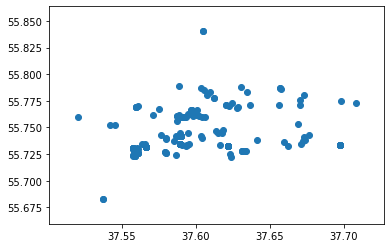

In [4]:
plt.scatter(X.iloc[:1000, 0], X.iloc[:1000, 1])

In [4]:
# масштабирование
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

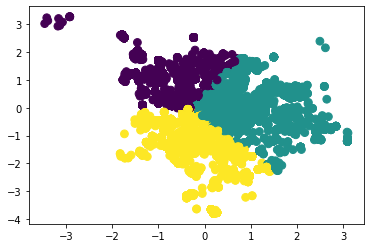

In [18]:
# KMeans
clf = KMeans(n_clusters=3)
clusters = clf.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)

аналогично исследовать скопления голосов за и против отдельно

In [22]:
# голоса "за"
X_1 = df[df['comment_class'] == 1][['x', 'y']]
X_1.head(2)

,x,y
28,37.588916,55.741982
45,37.589311,55.734273


In [23]:
# масштабирование
sc = StandardScaler()
X_scaled = sc.fit_transform(X_1)

Text(0.5, 1.0, 'голоса "за"')

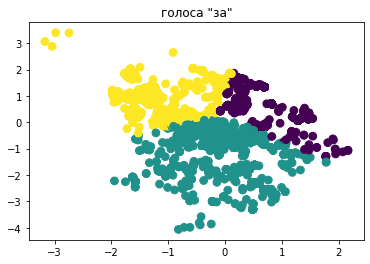

In [24]:
# KMeans
clf = KMeans(n_clusters=3)
clusters = clf.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.title('голоса "за"')

In [25]:
# голоса "против"
X_0 = df[df['comment_class'] == -1][['x', 'y']]
X_0.head(2)

,x,y
0,37.612416,55.777454
1,37.612416,55.777454


In [26]:
# масштабирование
sc = StandardScaler()
X_scaled = sc.fit_transform(X_0)

Text(0.5, 1.0, 'голоса "против"')

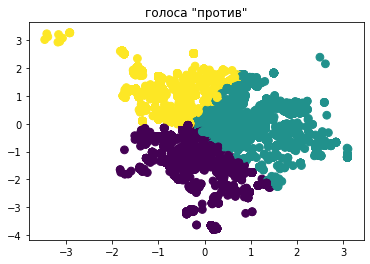

In [27]:
# KMeans
clf = KMeans(n_clusters=3)
clusters = clf.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.title('голоса "против"')

подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

In [12]:
# суммa квадратов расстояний объектов классов до их центроидов при разном количестве кластеров
k_inertia = []
ks = range(1,16)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

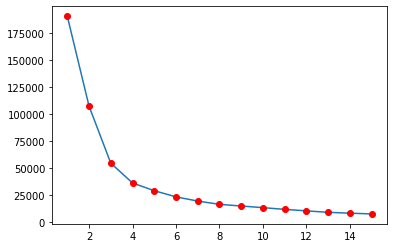

In [13]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

$${inertia_{k+1}-inertia_{k}}$$

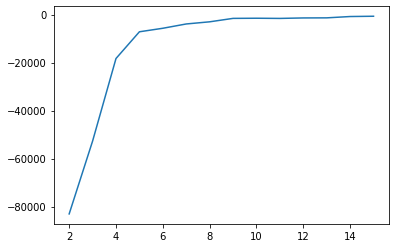

In [15]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [16]:
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3